In [1]:
#import modules:

import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import scipy.optimize as opt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
from err_ranges import err_ranges

In [2]:
wb.search("arable")

ID,Name,Field,Value
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production),Limitationsandexceptions,"...editions of this indicator, Fertilizer consumption (100 grams per hectare of arable land), reported data on a crop year basis, but this edition uses the calendar..."
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production),Longdefinition,"...consumption measures the quantity of plant nutrients used per unit of arable land. Fertilizer products cover nitrogenous, potash, and phosphate fertilizers ..."
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production),Statisticalconceptandmethodology,"...FAO defines arable land as land under temporary crops (double-cropped areas are counted once),..."
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land),IndicatorName,Fertilizer consumption (kilograms per hectare of arable land)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land),Limitationsandexceptions,"...editions of this indicator, Fertilizer consumption (100 grams per hectare of arable land), reported data on a crop year basis, but this edition uses the calendar..."
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land),Longdefinition,"...consumption measures the quantity of plant nutrients used per unit of arable land. Fertilizer products cover nitrogenous, potash, and phosphate fertilizers ..."
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land),Statisticalconceptandmethodology,"...FAO defines arable land as land under temporary crops (double-cropped areas are counted once),..."
AG.LND.AGRI.K2,Agricultural land (sq. km),Longdefinition,"...Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures. Arable land includes land..."
AG.LND.AGRI.K2,Agricultural land (sq. km),Statisticalconceptandmethodology,... and inland water bodies. Three components of the agricultural land are a) arable land - land defined by the FAO as land under temporary crops (double-cropped...
AG.LND.AGRI.ZS,Agricultural land (% of land area),Developmentrelevance,"...Agricultural land covers more than one-third of the world's land area, with arable land representing less than one-third of agricultural land (about 10 percent of..."


In [3]:
#read world bank data using function:

def read_data(indicator, country):
    
    """
    function which return two data frame: 
    one with year as columns and one with country as column.
    """
    
    year = wb.data.DataFrame(indicator, country, labels=True, time=range(1990,2020, 5))
    country = year.transpose()
    return year, country

In [4]:
y_forest, c_forest = read_data(["AG.LND.FRST.ZS"], "all")

In [5]:
y_forest

,Country,YR1990,YR1995,YR2000,YR2005,YR2010,YR2015
economy,,,,,,,
ZWE,Zimbabwe,48.666615,48.071165,47.475714,46.880264,46.284813,45.689363
ZMB,Zambia,63.778098,63.537309,63.296520,63.055731,62.814942,61.549254
YEM,"Yemen, Rep.",1.039832,1.039832,1.039832,1.039832,1.039832,1.039832
PSE,West Bank and Gaza,1.508306,1.508306,1.508306,1.523256,1.652824,1.684385
VIR,Virgin Islands (U.S.),70.114286,64.300000,58.485714,55.571429,52.657143,54.742857
...,...,...,...,...,...,...,...
CEB,Central Europe and the Baltics,31.956978,32.202848,32.470442,33.139902,33.734011,34.323558
CSS,Caribbean small states,91.385056,91.109065,90.833074,90.683599,90.534124,90.166975
ARB,Arab World,1.786077,1.754241,3.002028,1.712759,2.859552,2.905073


In [6]:
c_forest

economy,ZWE,ZMB,YEM,PSE,VIR,VNM,VEN,VUT,UZB,URY,...,EMU,TEA,EAP,EAS,EAR,CEB,CSS,ARB,AFW,AFE
Country,Zimbabwe,Zambia,"Yemen, Rep.",West Bank and Gaza,Virgin Islands (U.S.),Vietnam,"Venezuela, RB",Vanuatu,Uzbekistan,Uruguay,...,Euro area,East Asia & Pacific (IDA & IBRD countries),East Asia & Pacific (excluding high income),East Asia & Pacific,Early-demographic dividend,Central Europe and the Baltics,Caribbean small states,Arab World,Africa Western and Central,Africa Eastern and Southern
YR1990,48.666615,63.778098,1.039832,1.508306,70.114286,28.805678,58.983051,36.283839,7.157969,4.559479,...,34.25412,28.825106,29.04146,26.222406,25.351703,31.956978,91.385056,1.786077,22.776908,40.565912
YR1995,48.071165,63.537309,1.039832,1.508306,64.3,32.504931,57.353325,36.283839,6.477235,6.190721,...,35.385081,28.769126,28.969952,26.141983,24.943178,32.202848,91.109065,1.754241,22.186096,39.936851
YR2000,47.475714,63.29652,1.039832,1.508306,58.485714,37.883688,55.723598,36.283839,6.961591,7.821963,...,36.532518,28.734865,28.92174,26.073162,24.380697,32.470442,90.833074,3.002028,21.595284,33.980631
YR2005,46.880264,63.055731,1.039832,1.523256,55.571429,40.591092,54.790545,36.283839,7.417796,8.856988,...,37.267674,29.343876,29.519483,26.416713,23.956856,33.139902,90.683599,1.712759,21.134648,37.70112
YR2010,46.284813,62.814942,1.039832,1.652824,52.657143,43.177541,53.857491,36.283839,7.874001,9.892012,...,37.999098,29.95095,30.11529,26.759162,23.631785,33.734011,90.534124,2.859552,20.674012,31.910878
YR2015,45.689363,61.549254,1.039832,1.684385,54.742857,45.350598,52.925571,36.283839,8.055998,10.970175,...,38.397841,30.127627,30.283911,27.012083,23.163056,34.323558,90.166975,2.905073,20.234231,31.340526


In [7]:
y_arable, c_arable = read_data(["AG.LND.ARBL.ZS"], "all" )

In [8]:
y_arable

,Country,YR1990,YR1995,YR2000,YR2005,YR2010,YR2015
economy,,,,,,,
ZWE,Zimbabwe,7.522295,8.039292,9.305933,10.081427,10.339925,10.339925
ZMB,Zambia,3.888941,3.563405,3.788052,3.668330,4.573642,5.111718
YEM,"Yemen, Rep.",2.884634,3.092979,2.926303,2.437639,2.445215,2.154668
PSE,West Bank and Gaza,18.106312,18.438538,16.943522,16.445183,7.259136,8.441860
VIR,Virgin Islands (U.S.),11.428571,8.571429,5.714286,5.714286,2.857143,2.857143
...,...,...,...,...,...,...,...
CEB,Central Europe and the Baltics,NaN,39.154500,37.992246,34.568824,33.645772,32.939720
CSS,Caribbean small states,1.958701,2.071212,1.948870,1.806027,1.824132,1.869828
ARB,Arab World,3.527170,3.657092,3.544323,3.533504,3.370785,4.458581


In [9]:
c_arable

economy,ZWE,ZMB,YEM,PSE,VIR,VNM,VEN,VUT,UZB,URY,...,EMU,TEA,EAP,EAS,EAR,CEB,CSS,ARB,AFW,AFE
Country,Zimbabwe,Zambia,"Yemen, Rep.",West Bank and Gaza,Virgin Islands (U.S.),Vietnam,"Venezuela, RB",Vanuatu,Uzbekistan,Uruguay,...,Euro area,East Asia & Pacific (IDA & IBRD countries),East Asia & Pacific (excluding high income),East Asia & Pacific,Early-demographic dividend,Central Europe and the Baltics,Caribbean small states,Arab World,Africa Western and Central,Africa Eastern and Southern
YR1990,7.522295,3.888941,2.884634,18.106312,11.428571,16.402962,3.210702,1.640689,NaN,7.090618,...,26.95393,11.987819,12.040632,8.972132,12.601482,NaN,1.958701,3.52717,8.104221,5.814059
YR1995,8.039292,3.563405,3.092979,18.438538,8.571429,16.599588,2.926138,1.640689,10.519511,7.462004,...,26.231984,11.483741,11.547717,8.587676,12.520032,39.1545,2.071212,3.657092,9.226954,5.910405
YR2000,9.305933,3.788052,2.926303,16.943522,5.714286,19.931846,2.94201,1.640689,10.531265,7.844818,...,25.965257,11.634559,11.691251,8.937977,12.648389,37.992246,1.94887,3.544323,9.803577,6.032334
YR2005,10.081427,3.66833,2.437639,16.445183,5.714286,20.505047,3.010033,1.640689,10.265632,7.953377,...,25.031722,11.904991,11.962834,9.182476,12.887185,34.568824,1.806027,3.533504,10.359529,6.528305
YR2010,10.339925,4.573642,2.445215,7.259136,2.857143,20.761118,2.947679,1.640689,9.80724,11.615815,...,24.282651,12.082008,12.141634,9.254147,12.894571,33.645772,1.824132,3.370785,10.613389,7.072272
YR2015,10.339925,5.111718,2.154668,8.44186,2.857143,22.584578,2.947679,1.640689,9.300235,12.881956,...,23.94619,12.136454,12.192523,9.512589,12.904673,32.93972,1.869828,4.458581,11.113469,8.249165


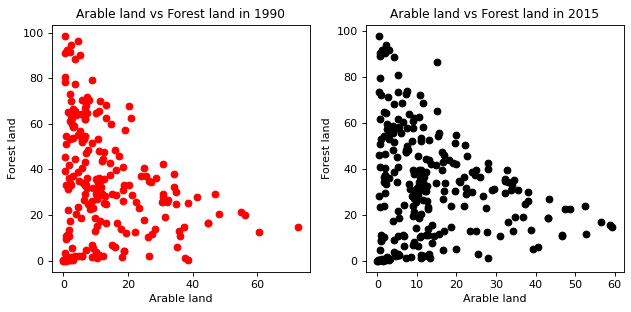

In [10]:
#scater plot for Arable land vs Forest land in year 1990 and 2015:
plt.figure(figsize=(8,4),dpi=80)
plt.subplot(1,2,1)
plt.scatter(y_arable["YR1990"], y_forest["YR1990"], color='r')
plt.xlabel('Arable land')
plt.ylabel('Forest land')
plt.title('Arable land vs Forest land in 1990',fontsize=11)

plt.subplot(1,2,2)
plt.scatter(y_arable["YR2015"],y_forest["YR2015"], color='black')
plt.xlabel('Arable land')
plt.ylabel('Forest land')
plt.title('Arable land vs Forest land in 2015',fontsize=11)
plt.savefig("Arable land vs Forest land in 2015 & 2019")
plt.tight_layout()
plt.show()

In [11]:
#creat new dataframe for year 1990 data:

year1990 = pd.DataFrame()
year1990["country"] = y_arable["Country"]
year1990['arable_land'] = y_arable["YR1990"]
year1990['forest_land'] = y_forest["YR1990"]
year1990.dropna(how='any',inplace=True)
year1990 = year1990.reset_index()

In [12]:
#creat new dataframe for year 2015 data:

year2015 = pd.DataFrame()
year2015["country"] = y_arable["Country"]
year2015['arable_land'] = y_arable["YR2015"]
year2015['forest_land'] = y_forest["YR2015"]
year2015.dropna(how='any',inplace=True)
year2015 = year2015.reset_index()

In [13]:
#normalizaton for data:

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(year1990.iloc[:, 2:])
scaled_df = pd.DataFrame(scaled_df)
scaled_df

,0,1
0,0.103533,0.493704
1,0.053516,0.647004
2,0.039690,0.010549
3,0.249234,0.015301
4,0.157307,0.711282
...,...,...
213,0.173454,0.257183
214,0.026944,0.927065
215,0.048535,0.018119
216,0.111544,0.231063


number of iterations 246
number of cluster centres 4
[[0.53149106 0.2539714 ]
 [0.12067606 0.06877634]
 [0.1633295  0.44246159]
 [0.07795044 0.71476887]]
4
(0.29977678, 0.11356089, 0.29254823)
(0.63139686, 0.10067417, 0.35664819)
(0.90848638, 0.24568473, 0.24598324)
(0.96298491, 0.6126247, 0.45145074)
[[0.53149106 0.2539714 ]
 [0.12067606 0.06877634]
 [0.1633295  0.44246159]
 [0.07795044 0.71476887]]


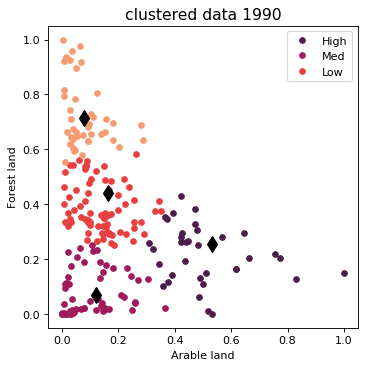

In [14]:
# set up the clusterer:

ap = cluster.AffinityPropagation(max_iter=2000, preference=-3,random_state=123)
ap.fit(scaled_df)
labels = ap.labels_
cen = ap.cluster_centers_

year1990["cluster"] = labels

x = scaled_df[0]
y = scaled_df[1]

# extract labels and centres:

print("number of iterations", ap.n_iter_)
print("number of cluster centres", len(cen))

print(cen)
# plot using the labels to select colour:

plt.figure(figsize=(5.0,5.0),dpi = 80)
print(len(cen))

rgb = sns.color_palette('rocket', len(cen)) #setting a color palette 

for l in range(0, len(cen)):     # loop over the different labels
    plt.plot(x[labels==l], y[labels==l], "o", markersize=5, label= l,color=rgb[l])
    print(rgb[l])
print(cen)    

# show cluster centres:

for ic in range(len(cen)):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)

plt.legend(["High", "Med", "Low"])
plt.xlabel("Arable land")
plt.ylabel("Forest land")
plt.title('clustered data 1990',fontsize=14)
plt.savefig("clustered data 1990")
plt.show()


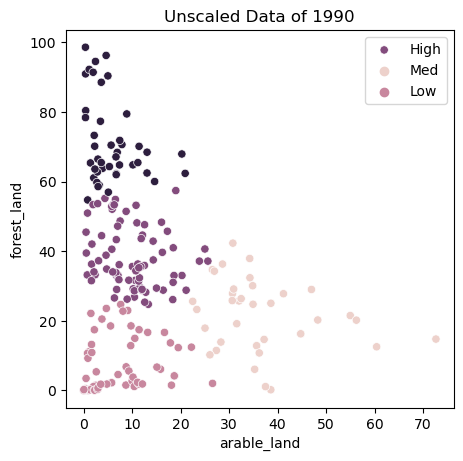

In [15]:
#showing unscaled data of 1990:

plt.figure(figsize=(5.0,5.0),dpi = 100)
sns.scatterplot(data=year1990, x='arable_land', y='forest_land', hue="cluster")
plt.legend(["High", "Med", "Low"])
plt.title('Unscaled Data of 1990')
plt.savefig("Unscaled Data of 1990")
plt.show()

In [16]:
#normalization for year 2015 data:

scaled_df15 = scaler.fit_transform(year2015.iloc[:, 2:])
scaled_df15 = pd.DataFrame(scaled_df15)

number of iterations 469
number of cluster centres 4
[[0.11236831 0.06675703]
 [0.25096091 0.34739286]
 [0.72631136 0.19008326]
 [0.06918345 0.69549853]]
4
(0.29977678, 0.11356089, 0.29254823)
(0.63139686, 0.10067417, 0.35664819)
(0.90848638, 0.24568473, 0.24598324)
(0.96298491, 0.6126247, 0.45145074)
[[0.11236831 0.06675703]
 [0.25096091 0.34739286]
 [0.72631136 0.19008326]
 [0.06918345 0.69549853]]


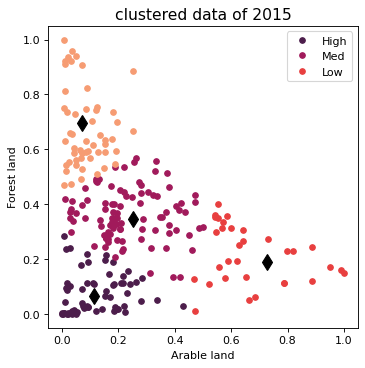

In [17]:
# set up the clusterer:

ap15 = cluster.AffinityPropagation(max_iter=2000, preference=-3,random_state=123)
ap15.fit(scaled_df15)
labels15 = ap15.labels_
cen15 = ap15.cluster_centers_

year2015["cluster"] = labels15

x = scaled_df15[0]
y = scaled_df15[1]

# extract labels and centres:

print("number of iterations", ap15.n_iter_)
print("number of cluster centres", len(cen15))

print(cen15)
# plot using the labels to select colour:

plt.figure(figsize=(5.0,5.0),dpi = 80)
print(len(cen15))

rgb = sns.color_palette('rocket', len(cen15)) #setting a color palette 

for l in range(0, len(cen15)):     # loop over the different labels
    plt.plot(x[labels15==l], y[labels15==l], "o", markersize=5, label= l,color=rgb[l])
    print(rgb[l])
print(cen15)    
# show cluster centres:

for ic in range(len(cen15)):
    xc, yc = cen15[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)

plt.legend(["High", "Med", "Low"])
plt.xlabel("Arable land")
plt.ylabel("Forest land")
plt.title('clustered data of 2015',fontsize=14)
plt.savefig("'clustered data of 2015'")
plt.show()


In [18]:
#extract data for india:

y_deforest, c_deforest = read_data(["AG.LND.FRST.ZS", "AG.LND.ARBL.ZS"], "IND")
Ind_deforest = c_deforest.reset_index()
Ind_deforest = Ind_deforest.iloc[1:, :]
Ind_deforest.columns = ['year', 'Forest_land', 'Arable_land']
Ind_deforest["year"] = [1990, 1995, 2000, 2005, 2010, 2015]
Ind_deforest

,year,Forest_land,Arable_land
1,1990,21.504848,54.97765
2,1995,22.119172,54.456997
3,2000,22.733495,54.127049
4,2005,23.053858,53.627249
5,2010,23.374221,52.808263
6,2015,23.822225,52.608814


In [19]:
#normalization:

Ind_deforest[[ 'Forest_land', 'Arable_land']] = scaler.fit_transform(Ind_deforest[[ 'Forest_land', 'Arable_land']])

C:\Users\vishv\AppData\Local\Temp/ipykernel_4176/2980463143.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years)


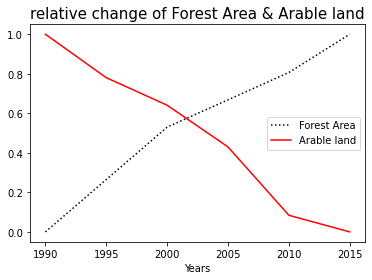

<Figure size 500x500 with 0 Axes>

In [20]:
#plot for showing ralative change for forest area and arable land:

fig, ax = plt.subplots()
plt.figure(figsize=(5.0,5.0),dpi = 100)

years = [1985, 1990, 1995, 2000, 2005, 2010, 2015]

ax.plot(Ind_deforest['Forest_land'], label = 'Forest Area', color ='k', ls=':')
ax.plot(Ind_deforest['Arable_land'], label = 'Arable land', color='red')
ax.set_title('relative change of Forest Area & Arable land',fontsize = 15)
ax.legend(loc="center right")
ax.set_xticklabels(years)
ax.set_xlabel('Years')
plt.savefig("change of Forest Area & Arable land")
plt.show()

In [21]:
def logistic(t, n0, g, t0):
    """Calculates the logistic function with scale factor n0 and growth rate g"""
    
    f = n0 / (1 + np.exp(-g*(t - t0)))
    
    return f

In [22]:
#function for make plot for forecast:

def plot_graph(df,i,param,covar,title): 

    plt.figure(figsize=(5.0,5.0),dpi = 100)

    
    sigma = np.sqrt(np.diag(covar)) #calculating the sigma value
    
    year = np.arange(1990, 2040, 5) #defining range of years for prediction
    
    forecast = logistic(year, *param) #predicting
    
    #calculating the upper and lower intervals
    low, up = err_ranges(year, logistic, param, sigma)
    
    #plotting the figure
    plt.plot(df['year'],df[i],label=i) #original data

    plt.plot(year, forecast, label="forecast",color = 'k',ls=':') #fitted data
    
    #filling color between the confidence intervals
    plt.fill_between(year, low, up, color="cyan")
    plt.xlabel("year")
    plt.ylabel(i)
    plt.title(title)
    plt.savefig(title)
    plt.legend(loc="best")

In [23]:
#fitting data:

param_f, covar_f = opt.curve_fit(logistic, Ind_deforest["year"], Ind_deforest["Forest_land"], p0=(3e12, 0.03, 2000.0))

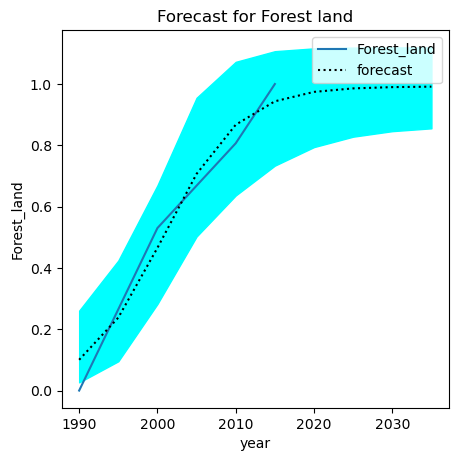

In [24]:
#showing plot for forcast of forest land:

plot_graph(Ind_deforest, i='Forest_land', param = param_f, covar = covar_f, title = "Forecast for Forest land")

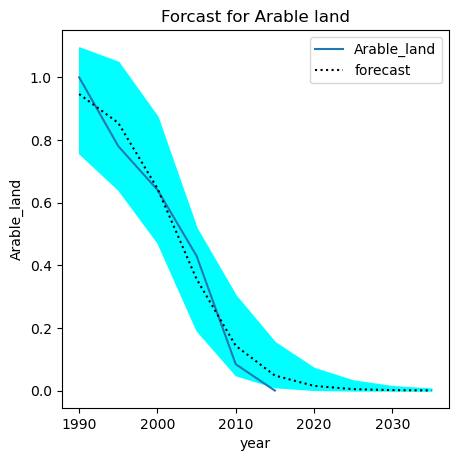

In [25]:
#forcast for Arable land:

param_a, covar_a = opt.curve_fit(logistic, Ind_deforest["year"], Ind_deforest["Arable_land"], p0=(3e12, 0.03, 2000.0))
plot_graph(Ind_deforest, i='Arable_land', param = param_a, covar = covar_a, title = "Forcast for Arable land")

---